In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
## DATA UNDERSTANDING
raw_credit = pd.read_csv('C:/Users/user/Desktop/Predicting_credit_cards/credit_record.csv')
raw_credit = raw_credit.drop('MONTHS_BALANCE',axis=1)
print(raw_credit.head())
print(raw_credit.shape,raw_credit.info())

        ID STATUS
0  5001711      X
1  5001711      0
2  5001711      0
3  5001711      0
4  5001712      C
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   ID      1048575 non-null  int64 
 1   STATUS  1048575 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.0+ MB
(1048575, 2) None


In [4]:
raw_application = pd.read_csv('C:/Users/user/Desktop/Predicting_credit_cards/application_record.csv')
print(raw_application.head())
print(raw_application.shape)

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 


ID : Client number	

CODE_GENDER	: Gender	

FLAG_OWN_CAR : Is there a car	

FLAG_OWN_REALTY	: Is there a property	

CNT_CHILDREN : Number of children	

AMT_INCOME_TOTAL : Annual income

NAME_INCOME_TYPE : Income category	

NAME_EDUCATION_TYPE	: Education level	

NAME_FAMILY_STATUS	: Marital status	

NAME_HOUSING_TYPE	: Way of living	

DAYS_BIRTH	: Birthday	,Count backwards from current day (0), -1 means yesterday

DAYS_EMPLOYED	: Start date of employment	,Count backwards from current day(0). If positive, it means the person currently unemployed.

FLAG_MOBIL	: Is there a mobile phone	

FLAG_WORK_PHONE	: Is there a work phone	

FLAG_PHONE	: Is there a phone	

FLAG_EMAIL	: Is there an email	

OCCUPATION_TYPE	: Occupation	

CNT_FAM_MEMBERS	: Family size	

MONTHS_BALANCE	: Record month	,The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

STATUS	: Status ,	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [5]:
df = raw_application.merge(raw_credit, on='ID', how='inner')
print(df.shape)
print(df.sample(5))

(777715, 19)
             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
421011  5088917           F            N               Y             1   
219157  5045859           M            N               N             0   
776547  5135485           F            N               Y             0   
343354  5065579           F            N               Y             2   
378584  5068171           M            Y               Y             1   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
421011          157500.0          Working  Secondary / secondary special   
219157          121500.0          Working               Higher education   
776547          135000.0    State servant               Higher education   
343354          144000.0          Working  Secondary / secondary special   
378584          310500.0          Working               Higher education   

          NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
42101

In [6]:
df.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
count,7.777150e+05,777715,777715,777715,777715.000000,7.777150e+05,777715,777715,777715,777715,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,537667,777715.000000,777715
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,8
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,C
freq,NaN,518851,473355,512948,NaN,NaN,400164,524261,546619,697151,NaN,NaN,NaN,NaN,NaN,NaN,131572,NaN,329536
mean,5.078743e+06,NaN,NaN,NaN,0.428082,1.885348e+05,NaN,NaN,NaN,NaN,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,NaN,2.208837,NaN
std,4.180442e+04,NaN,NaN,NaN,0.745755,1.016225e+05,NaN,NaN,NaN,NaN,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,NaN,0.907380,NaN
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,NaN
25%,5.044568e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,NaN
50%,5.069530e+06,NaN,NaN,NaN,0.000000,1.620000e+05,NaN,NaN,NaN,NaN,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,NaN
75%,5.115551e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,NaN


In [7]:
### cleaning
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
STATUS                      0
dtype: int64

In [8]:
print(df['OCCUPATION_TYPE'].nunique())
df.fillna('Others',axis=1,inplace=True)
print(df['OCCUPATION_TYPE'].nunique())

18
19


In [9]:
print(df.isnull().sum())
df.shape

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64


(777715, 19)

In [10]:
df.duplicated().sum()

702841

In [11]:
df.drop('FLAG_MOBIL', axis=1, inplace=True)
## everyone have nmobile phone so it's insignificant

In [12]:
### Feature engineering
Means_Id = df.groupby('ID')['AMT_INCOME_TOTAL'].mean()

In [13]:
def convert_day_to_year(days):
    days = round(days/-365,0)
    return days

In [14]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Others,2.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,0,0,0,Laborers,1.0,0


In [15]:
df['Age'] = df['DAYS_BIRTH'].apply(convert_day_to_year)
df['Age'] = df['Age'].astype(int)
df['Experience'] = df['DAYS_EMPLOYED'].apply(convert_day_to_year)
df.drop('DAYS_BIRTH',axis=1,inplace=True)
df.drop('DAYS_EMPLOYED',axis=1,inplace=True)

<AxesSubplot: >

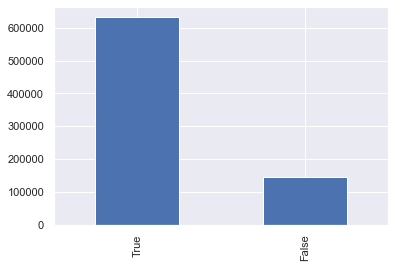

In [16]:
(df['Experience'] > 0).value_counts().plot(kind="bar")
### True is number of people who unemployment

In [17]:
def employment_status(date):
    # Determine the employment status based on the duration
    if date < 0:
        return "Unemployed"
    else:
        return "Employment"

In [18]:
df['Employment_status'] = df['Experience'].apply(employment_status)

<AxesSubplot: ylabel='Employment_status'>

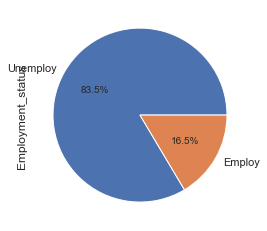

In [19]:
df['Employment_status'].value_counts().plot(kind="pie",autopct="%.1f%%",labels=["Unemploy","Employ"])
## 83.5 percent of people are unemployed while only 16.5 percent are employed

In [20]:
df['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
df['STATUS']=df['STATUS'].astype(int)

In [21]:
def Risk_evaluation(score):
    risk_range = [2,3,4,5]
    if score in risk_range:
        return 'Risk'
    else:
        return 'No Risk'


## 1 risk 0 No 

In [22]:
df['Risk'] = df['STATUS'].apply(Risk_evaluation)
df['Risk'].value_counts(normalize=True)
## Imbalance dataset

No Risk    0.996364
Risk       0.003636
Name: Risk, dtype: float64

In [23]:
df.drop('STATUS',axis=1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Age,Experience,Employment_status,Risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,33,12.0,Employment,No Risk
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,33,12.0,Employment,No Risk
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,33,12.0,Employment,No Risk
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,33,12.0,Employment,No Risk
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,33,12.0,Employment,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,25,3.0,Employment,No Risk
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,25,3.0,Employment,Risk
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,25,3.0,Employment,No Risk
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,25,3.0,Employment,No Risk


In [24]:
df = df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car', 
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Nbchildren',
                               'AMT_INCOME_TOTAL':'Total_income_per_year','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_level','NAME_FAMILY_STATUS':'Marital_status',
                               'NAME_HOUSING_TYPE':'Way_of_living','FLAG_WORK_PHONE':'Workphone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation',
                               'CNT_FAM_MEMBERS':'Nbfamily_member'})

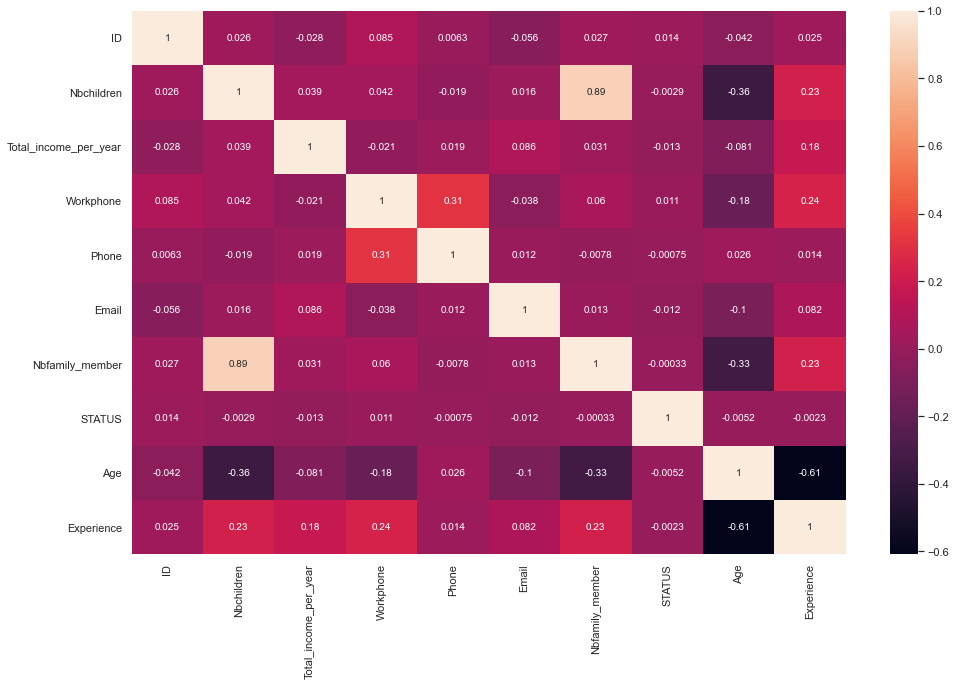

In [25]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot= True)
plt.show()

In [26]:
df

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,Workphone,Phone,Email,Occupation,Nbfamily_member,STATUS,Age,Experience,Employment_status,Risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,6,33,12.0,Employment,No Risk
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,6,33,12.0,Employment,No Risk
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,6,33,12.0,Employment,No Risk
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,6,33,12.0,Employment,No Risk
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,6,33,12.0,Employment,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,0,25,3.0,Employment,No Risk
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,2,25,3.0,Employment,Risk
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,1,25,3.0,Employment,No Risk
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,0,25,3.0,Employment,No Risk


F    0.667148
M    0.332852
Name: Gender, dtype: float64


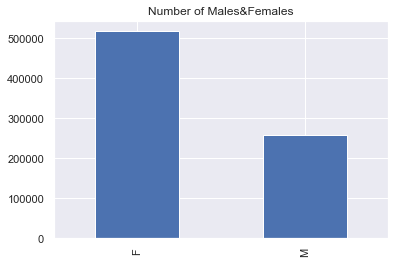

In [27]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Number of Males&Females')
print(df['Gender'].value_counts(normalize=True))


In [28]:
Average_total_income_gender = df.groupby('Gender')['Total_income_per_year'].mean()
Average_total_income_gender

Gender
F    173899.656380
M    217868.583436
Name: Total_income_per_year, dtype: float64

Female ane male proportion is 67 percent & 33 percent

Average Income for Female is 173900 $

Average Income for Male is 217869 $

In [29]:
numeric_cols = df.select_dtypes(include='number')
print(numeric_cols.columns)

Index(['ID', 'Nbchildren', 'Total_income_per_year', 'Workphone', 'Phone',
       'Email', 'Nbfamily_member', 'STATUS', 'Age', 'Experience'],
      dtype='object')


<AxesSubplot: xlabel='Nbchildren'>

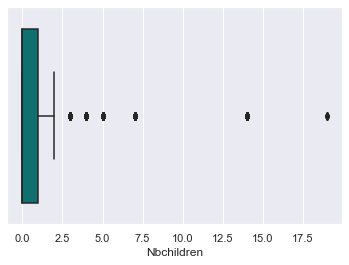

In [30]:
## Numerical Values
sns.boxplot(x = df['Nbchildren'], color= 'teal')   

<AxesSubplot: xlabel='Total_income_per_year'>

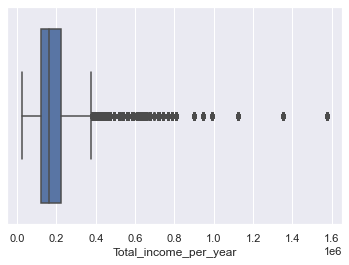

In [31]:
sns.boxplot(x = df['Total_income_per_year'])

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: ylabel='Density'>

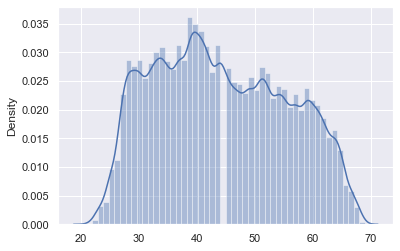

In [32]:
sns.distplot(x=df['Age'])

In [33]:
df

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,Workphone,Phone,Email,Occupation,Nbfamily_member,STATUS,Age,Experience,Employment_status,Risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,6,33,12.0,Employment,No Risk
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,6,33,12.0,Employment,No Risk
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,6,33,12.0,Employment,No Risk
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,6,33,12.0,Employment,No Risk
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Others,2.0,6,33,12.0,Employment,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,0,25,3.0,Employment,No Risk
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,2,25,3.0,Employment,Risk
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,1,25,3.0,Employment,No Risk
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,0,25,3.0,Employment,No Risk


In [34]:
## categorical value
def Categorical_countplot(features):
    for categorical_columns in features:
        plt.figure(figsize=(12, 12))
        ax=sns.countplot(y=df[categorical_columns], hue='Gender' , data=df)
        plt.legend(loc='best')
        total = len(df[categorical_columns])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

In [35]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
print(categorical_columns.columns)

Index(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'Employment_status',
       'Risk'],
      dtype='object')


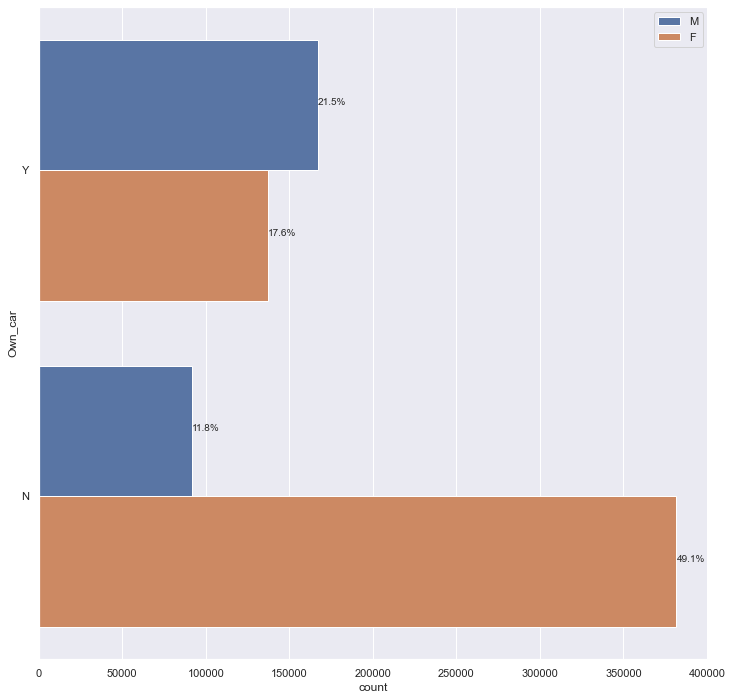

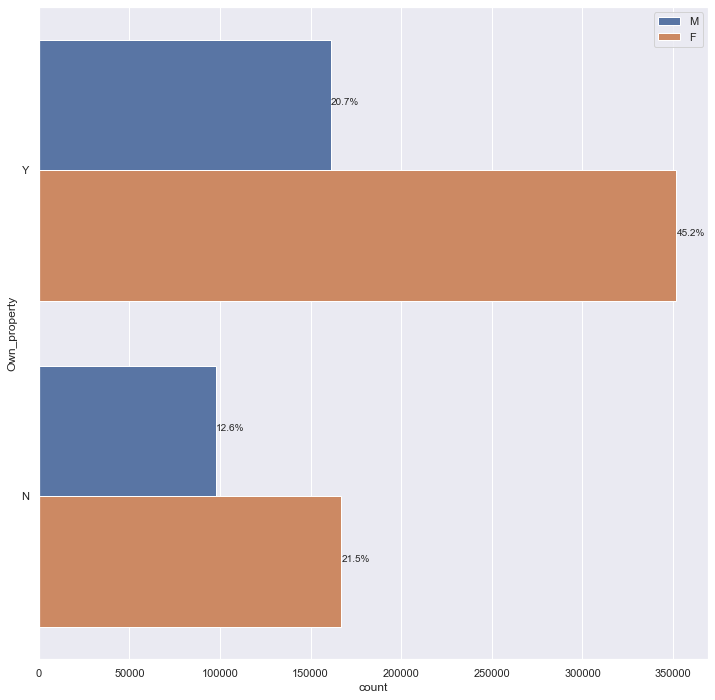

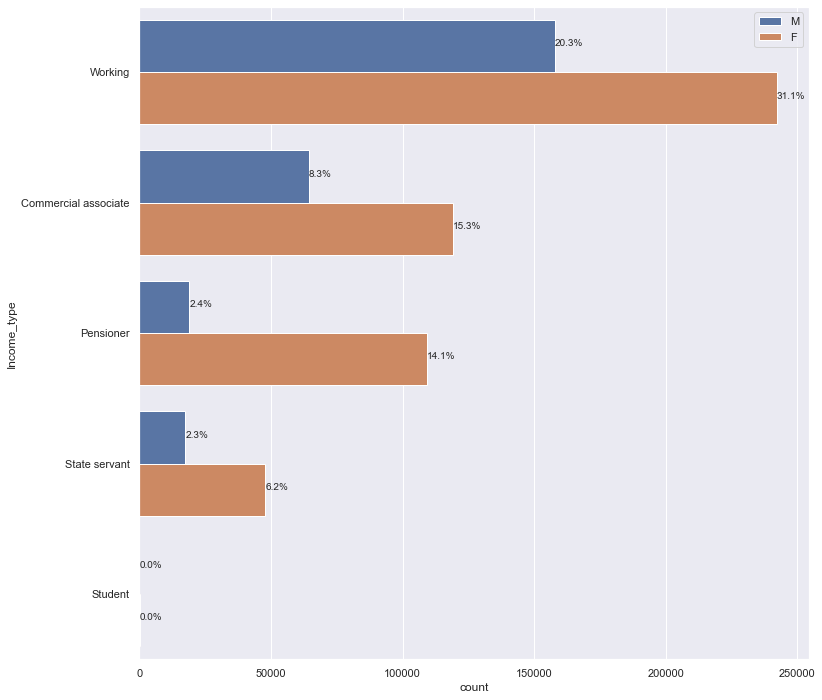

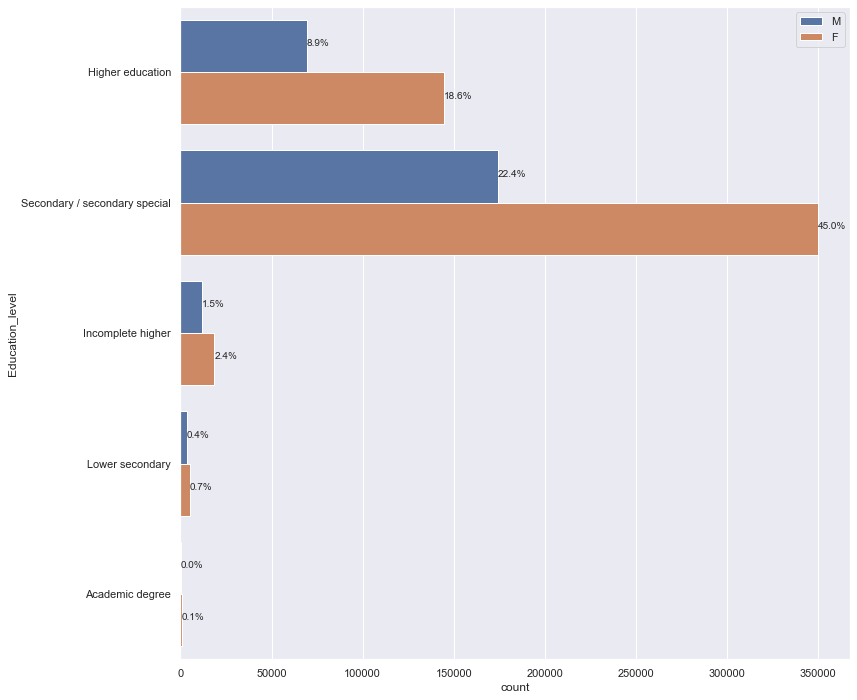

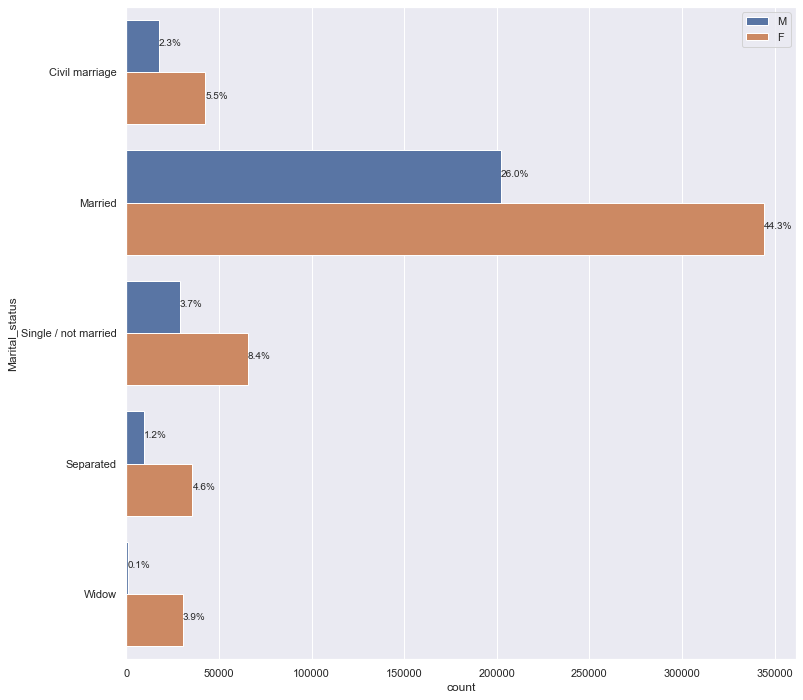

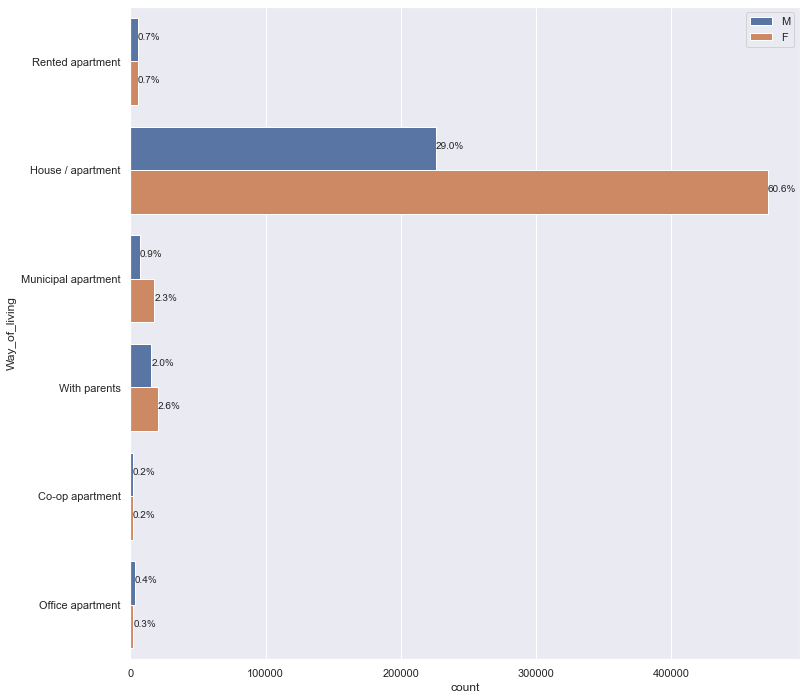

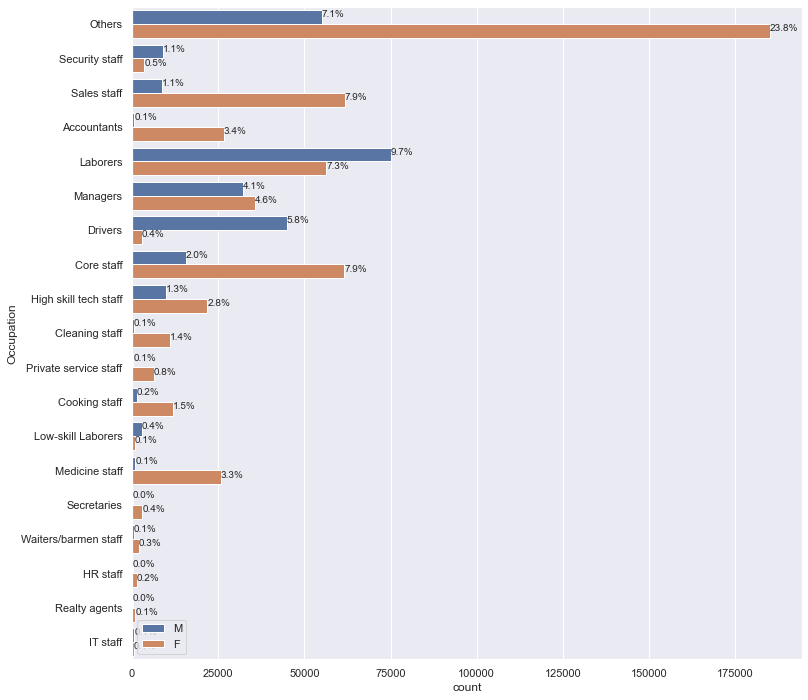

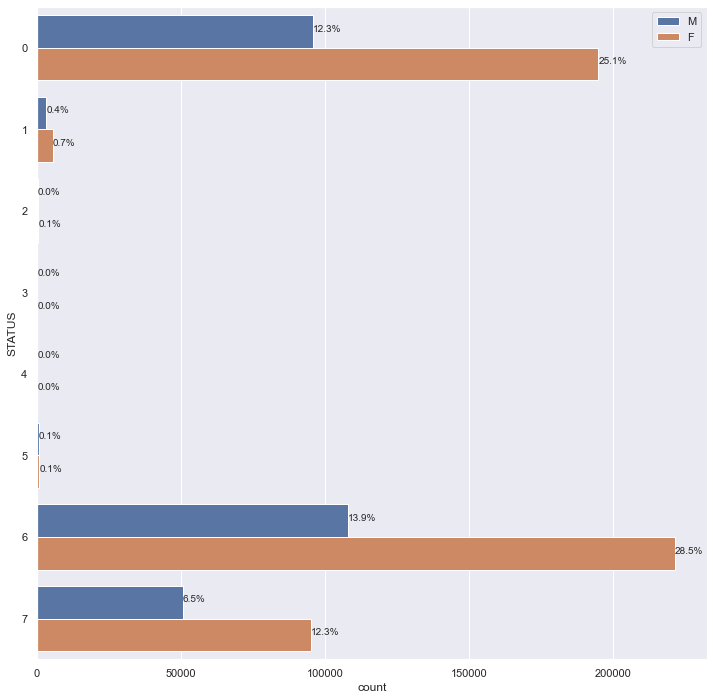

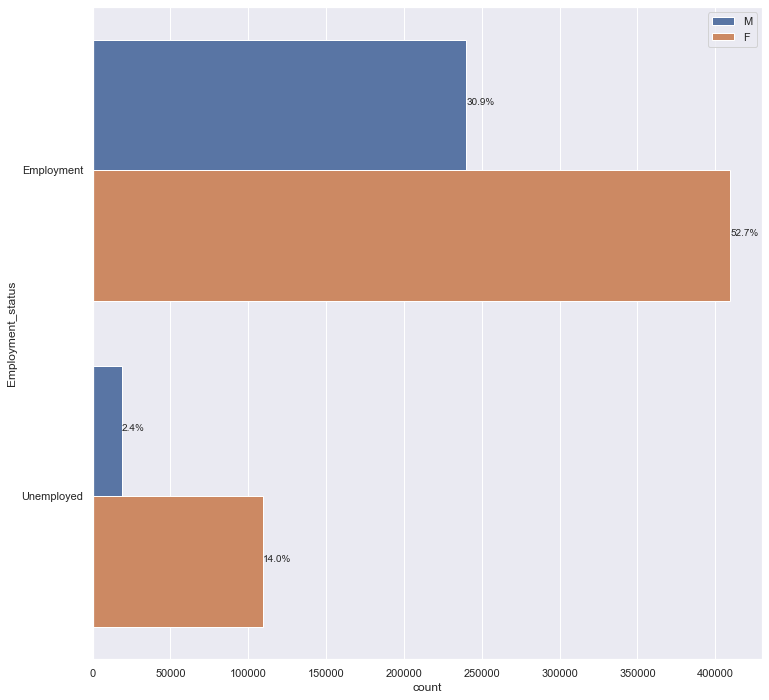

In [36]:
Categorical_countplot(['Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'STATUS',
       'Employment_status'])

In [37]:
df.columns.values

array(['ID', 'Gender', 'Own_car', 'Own_property', 'Nbchildren',
       'Total_income_per_year', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Nbfamily_member', 'STATUS', 'Age', 'Experience',
       'Employment_status', 'Risk'], dtype=object)

In [38]:
categorical_columns.drop('Occupation',axis=1).columns.values

array(['Gender', 'Own_car', 'Own_property', 'Income_type',
       'Education_level', 'Marital_status', 'Way_of_living',
       'Employment_status', 'Risk'], dtype=object)

In [39]:
df.drop('STATUS',axis=1,inplace=True)

In [40]:
### Data Preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in df:
    if df[x].dtypes=='object':
        df[x] = encoder.fit_transform(df[x])

In [41]:
df

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,Workphone,Phone,Email,Occupation,Nbfamily_member,Age,Experience,Employment_status,Risk
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,0,0,12,2.0,33,12.0,0,0
1,5008804,1,1,1,0,427500.0,4,1,0,4,1,0,0,12,2.0,33,12.0,0,0
2,5008804,1,1,1,0,427500.0,4,1,0,4,1,0,0,12,2.0,33,12.0,0,0
3,5008804,1,1,1,0,427500.0,4,1,0,4,1,0,0,12,2.0,33,12.0,0,0
4,5008804,1,1,1,0,427500.0,4,1,0,4,1,0,0,12,2.0,33,12.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,0,1,0,112500.0,4,4,3,4,0,0,0,8,1.0,25,3.0,0,0
777711,5150337,1,0,1,0,112500.0,4,4,3,4,0,0,0,8,1.0,25,3.0,0,1
777712,5150337,1,0,1,0,112500.0,4,4,3,4,0,0,0,8,1.0,25,3.0,0,0
777713,5150337,1,0,1,0,112500.0,4,4,3,4,0,0,0,8,1.0,25,3.0,0,0


In [42]:
### MODELING
X = df.drop('Risk', axis=1)
y = df['Risk']

In [43]:
# data standarization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(X)

In [45]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=25)
X, y = undersample.fit_resample(x_scaled, y)

In [49]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,shuffle=True)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Logit = LogisticRegression()
Logit.fit(x_train, y_train)

print('Logistic Model Accuracy : ', Logit.score(x_test, y_test)*100, '%')

prediction = Logit.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Logistic Model Accuracy :  60.106069534472596 %

Confusion matrix :
[[503 352]
 [325 517]]

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       855
           1       0.59      0.61      0.60       842

    accuracy                           0.60      1697
   macro avg       0.60      0.60      0.60      1697
weighted avg       0.60      0.60      0.60      1697



In [54]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test, y_test)*100, '%')

prediction = decision_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Decision Tree Model Accuracy :  85.38597525044196 %

Confusion matrix :
[[702 153]
 [ 95 747]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       855
           1       0.83      0.89      0.86       842

    accuracy                           0.85      1697
   macro avg       0.86      0.85      0.85      1697
weighted avg       0.86      0.85      0.85      1697



In [56]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train, y_train)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test, y_test)*100, '%')

prediction = RandomForest_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Random Forest Model Accuracy :  84.08956982911019 %

Confusion matrix :
[[775  80]
 [190 652]]

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       855
           1       0.89      0.77      0.83       842

    accuracy                           0.84      1697
   macro avg       0.85      0.84      0.84      1697
weighted avg       0.85      0.84      0.84      1697



In [57]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train, y_train)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test, y_test)*100, '%')

prediction = svc_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Support Vector Classifier Accuracy :  79.84678845020625 %

Confusion matrix :
[[697 158]
 [184 658]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       855
           1       0.81      0.78      0.79       842

    accuracy                           0.80      1697
   macro avg       0.80      0.80      0.80      1697
weighted avg       0.80      0.80      0.80      1697

